In [72]:
library(tidyverse)


<h2>1. Data Description</h2>
<p>The dataset used in this project consists of two files: <code>sessions.csv</code> and <code>players.csv</code>. The focus of this report is on <code>sessions.csv</code>, which records play sessions from a video game research server.</p>

<h3>Dataset Overview</h3>
<ul>
    <li><strong>sessions.csv</strong> (1,535 rows, 5 columns)
        <ul>
            <li><code>hashedEmail</code>: Unique identifier for each player.</li>
            <li><code>start_time</code>: Timestamp indicating when a session began.</li>
            <li><code>end_time</code>: Timestamp indicating when a session ended.</li>
            <li><code>original_start_time</code>: Unix timestamp format of start time.</li>
            <li><code>original_end_time</code>: Unix timestamp format of end time.</li>
        </ul>
    </li>
</ul>

<ul>
    <li><strong>players.csv</strong> (196 rows, 7 columns, not the primary focus)
        <ul>
            <li>Contains information on player experience, subscription status, play hours, demographics.</li>
        </ul>
    </li>
</ul>

<h3>Potential Issues</h3>
<ul>
    <li>Missing Values: Some <code>end_time</code> values are missing, which could affect session duration calculations.</li>
    <li>Timestamp Format: Dates are recorded without seconds, which may require adjustments.</li>
    <li>Data Collection Bias: Players included in the dataset may not be representative of all gamers, impacting generalizability.</li>
</ul>

<h2>2. Research Question</h2>
<h3>Broad Question:</h3>
<p>How can we predict demand on the game server to optimize resources and improve user experience?</p>

<h3>Specific Question:</h3>
<p>Can we predict the peak hours of player activity using historical session data?</p>

<ul>
    <li>Response Variable: Number of active players in a given hour.</li>
    <li>Explanatory Variable: Hour of day, day of the week.</li>
    <li>Why This Question?: Understanding peak play hours helps with resource allocation such as server capacity or licensing.</li>
</ul>

<h2>3. Exploratory Data Analysis</h2>

In [78]:
players <- read_csv("https://raw.githubusercontent.com/anderpudding/dsci-project-005-16/refs/heads/main/data/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/anderpudding/dsci-project-005-16/refs/heads/main/data/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


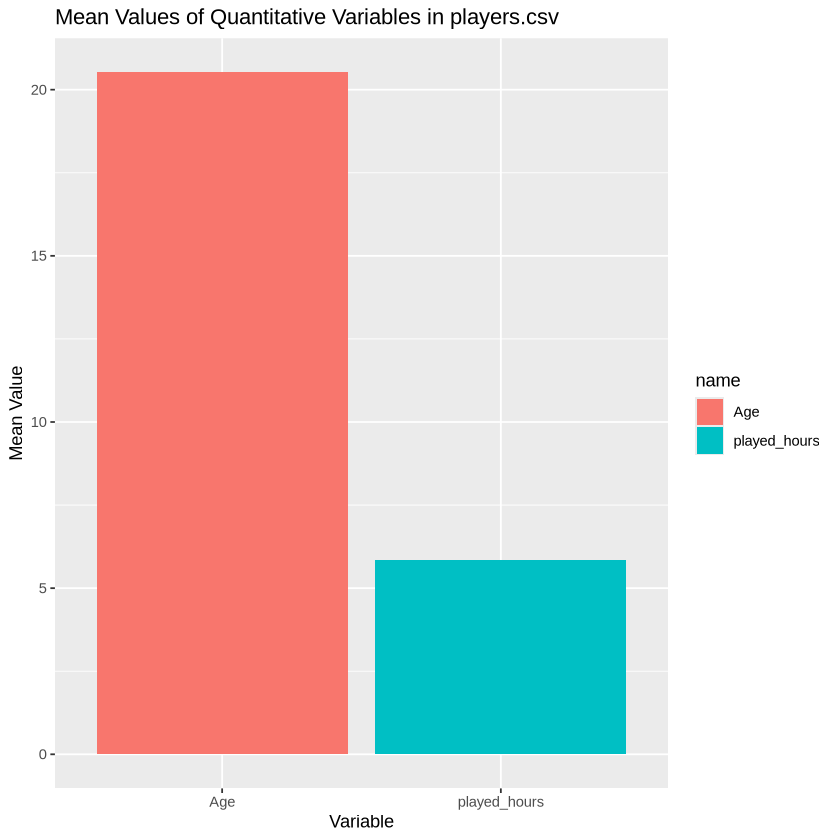

In [79]:
mean_values <- players |>
    summarise(across(where(is.numeric), mean, na.rm = TRUE))

ggplot(pivot_longer(mean_values, cols = everything()), aes(x = name, y = value, fill = name)) +
  geom_bar(stat = "identity") +
  labs(title = "Mean Values of Quantitative Variables in players.csv", 
       x = "Variable", 
       y = "Mean Value")

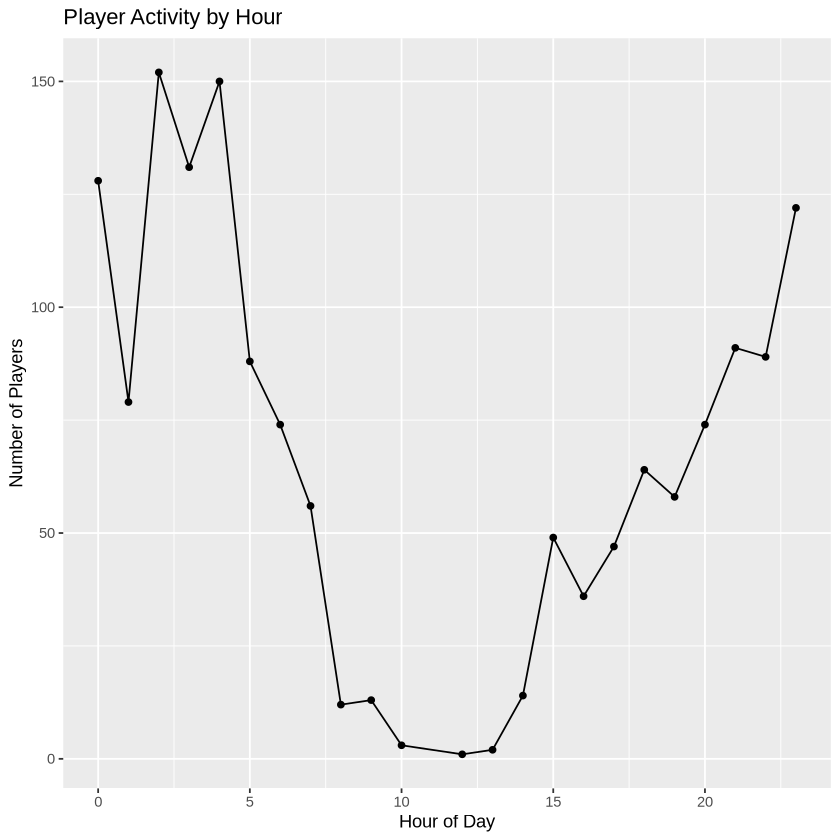

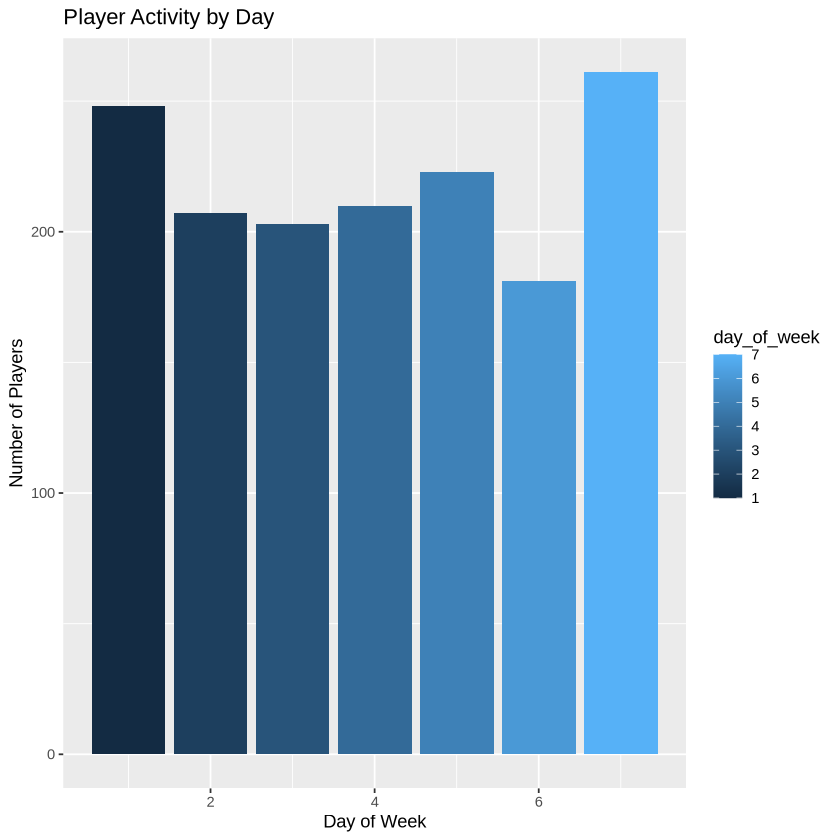

In [80]:
sessions <- sessions |>
    mutate(start_time = dmy_hm(start_time))
sessions <- sessions |>
    mutate(hour = hour(start_time), day_of_week = wday(start_time))
sessions <- drop_na(sessions, end_time)

hourly_players <- sessions |>
    group_by(hour) |>
    summarise(player_count = n())
daily_players <- sessions |>
  group_by(day_of_week) |>
  summarise(player_count = n())

ggplot(hourly_players, aes(x = hour, y = player_count)) +
    geom_line() +
    geom_point() +
    labs(title = "Player Activity by Hour", 
         x = "Hour of Day", 
         y = "Number of Players")

ggplot(daily_players, aes(x = day_of_week, y = player_count, fill = day_of_week)) +
  geom_bar(stat = "identity") +
  labs(title = "Player Activity by Day",
       x = "Day of Week",
       y = "Number of Players")

<h2>4. Methods and Plan</h2>
<h3>Proposed Method: Time Series Analysis & Regression</h3>
<ul>
    <li><strong>Why?</strong>
        <ul>
            <li>Time-based trends can be effectively captured using linear regression or moving averages.</li>
            <li>Simple models provide interpretable insights into player behavior.</li>
        </ul>
    </li>
    <li><strong>Assumptions:</strong>
        <ul>
            <li>Player activity follows consistent patterns over time.</li>
            <li>Historical data is representative of future trends.</li>
        </ul>
    </li>
    <li><strong>Potential Limitations:</strong>
        <ul>
            <li>Unexpected events such as promotions and server issues could disrupt patterns.</li>
            <li>Requires sufficient historical data to make meaningful predictions.</li>
        </ul>
    </li>
    <li><strong>Data Processing Plan:</strong>
        <ul>
            <li>Split data into training (80%) and testing (20%) sets.</li>
            <li>Compare models using mean absolute error.</li>
            <li>Use cross-validation to ensure robustness.</li>
        </ul>
    </li>
</ul>